### Kütüphanelerin Import Edilmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### DataFrame' in Yüklenmesi ve Analizi

In [2]:
# read the data
df = pd.read_csv("D:\\LogAI\\Teydeb_Proje_OnCalisma.csv")

In [3]:
df.head()

,Unnamed: 0,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,0,16/02/2018 08:27:23,112640768,3,0,0,0,0,...,0,0.0,0.0,0,0,56300000.0,138.592929,56300000,56300000,0
1,1,0,0,16/02/2018 08:30:12,112641773,3,0,0,0,0,...,0,0.0,0.0,0,0,56300000.0,263.750829,56300000,56300000,0
2,2,35605,6,16/02/2018 08:26:55,20784143,23,44,2416,2416,240,...,20,2624734.0,0.0,2624734,2624734,9058214.0,0.000000,9058214,9058214,0
3,3,0,0,16/02/2018 08:33:01,112640836,3,0,0,0,0,...,0,0.0,0.0,0,0,56300000.0,82.024387,56300000,56300000,0
4,4,23,6,16/02/2018 08:27:59,20,1,1,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,0


In [4]:
nan_counts = df.isna().sum()
nan_counts.to_list()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525399 entries, 0 to 4525398
Data columns (total 81 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Dst Port           int64  
 2   Protocol           int64  
 3   Timestamp          object 
 4   Flow Duration      int64  
 5   Tot Fwd Pkts       int64  
 6   Tot Bwd Pkts       int64  
 7   TotLen Fwd Pkts    int64  
 8   TotLen Bwd Pkts    int64  
 9   Fwd Pkt Len Max    int64  
 10  Fwd Pkt Len Min    int64  
 11  Fwd Pkt Len Mean   float64
 12  Fwd Pkt Len Std    float64
 13  Bwd Pkt Len Max    int64  
 14  Bwd Pkt Len Min    int64  
 15  Bwd Pkt Len Mean   float64
 16  Bwd Pkt Len Std    float64
 17  Flow Byts/s        float64
 18  Flow Pkts/s        float64
 19  Flow IAT Mean      float64
 20  Flow IAT Std       float64
 21  Flow IAT Max       int64  
 22  Flow IAT Min       int64  
 23  Fwd IAT Tot        int64  
 24  Fwd IAT Mean       float64
 25  Fwd IAT Std       

In [6]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)
df.drop(['Timestamp'], axis=1,inplace=True)

#### Boxplot Analizi

* Grafikler incelendiğinde belirli sınıflarda yoğun aykırı değerlerin olduğu görülmekte.
* Bu sınıflarda genelde çok düşük ve çok yüksek değerlerin olduğu görülmekte, bu dağılımda dengesizlik yaratır ve modelin genelleme yeteneğini azaltabilir. Bu sebeple bu aykırı değerler giderilmelidir.

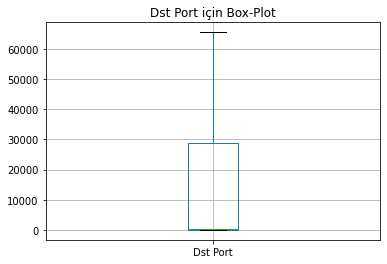

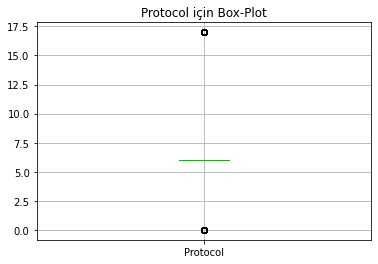

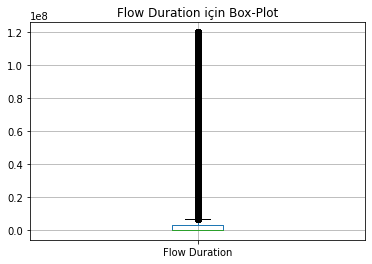

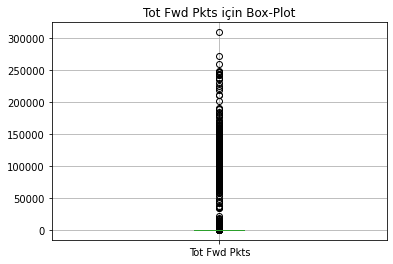

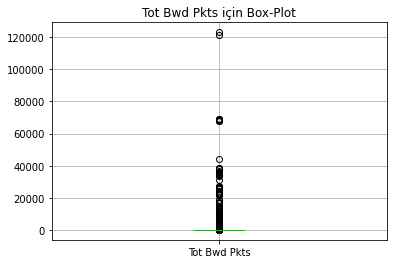

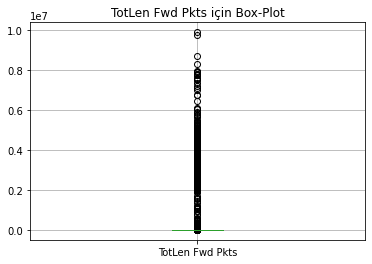

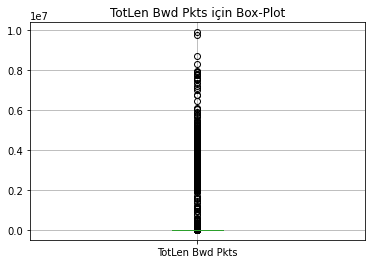

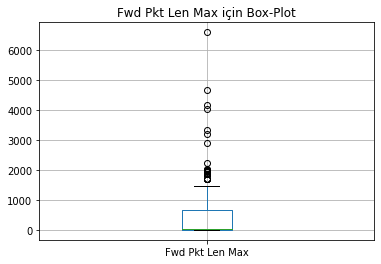

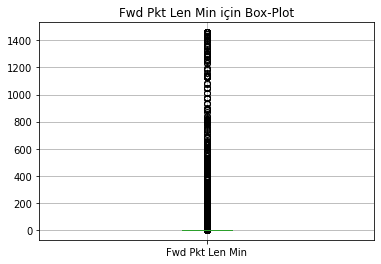

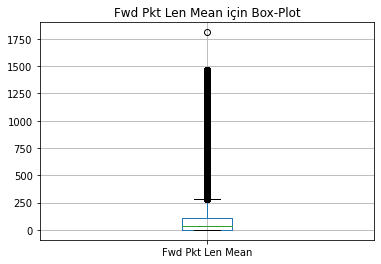

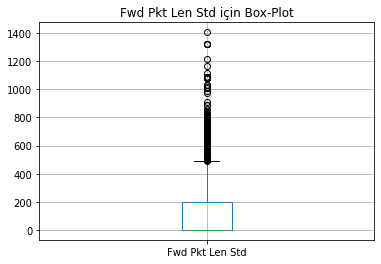

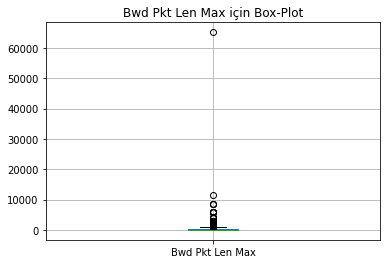

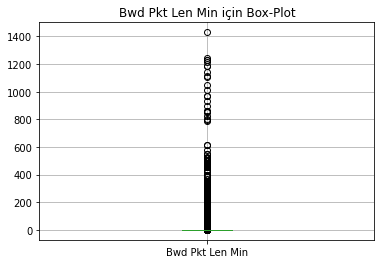

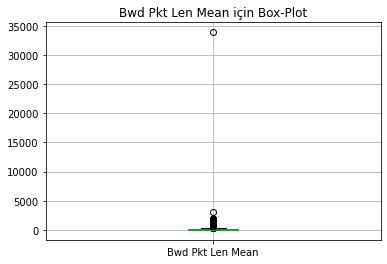

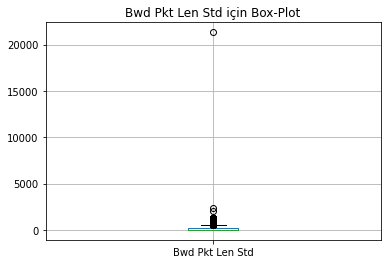

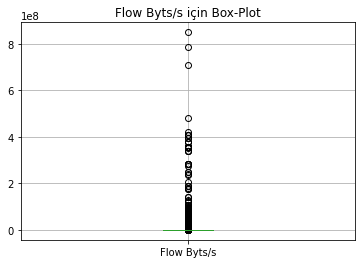

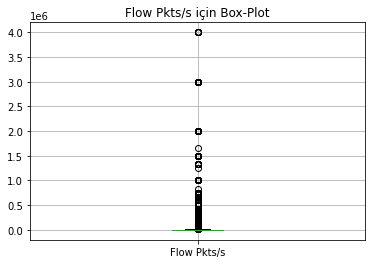

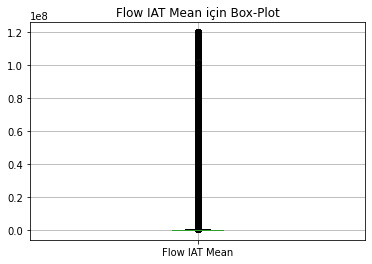

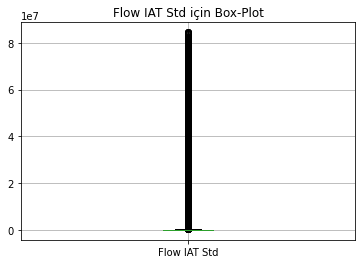

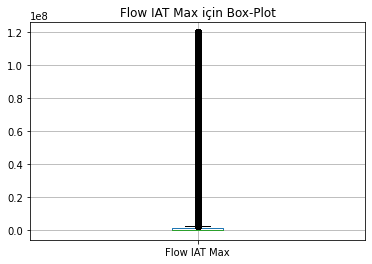

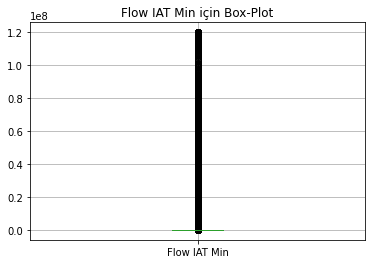

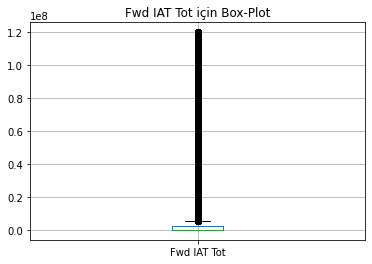

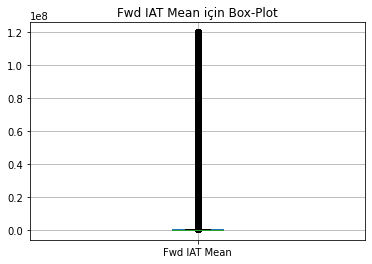

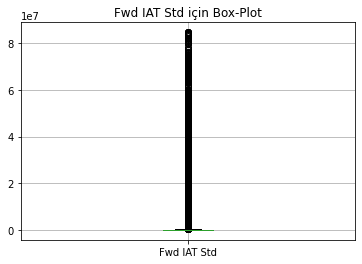

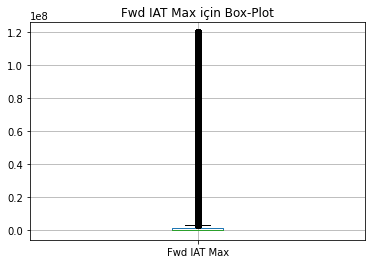

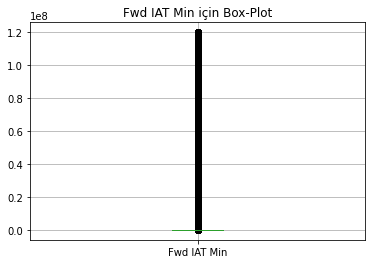

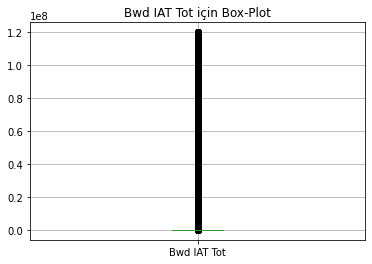

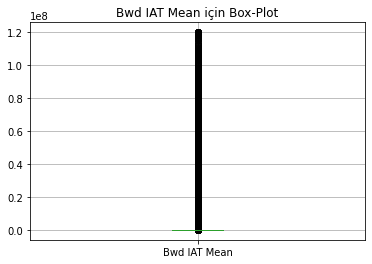

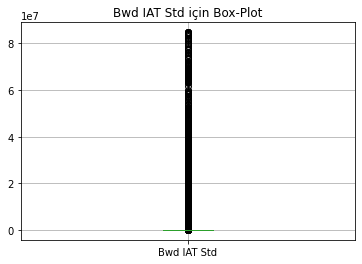

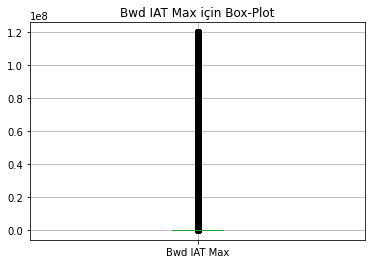

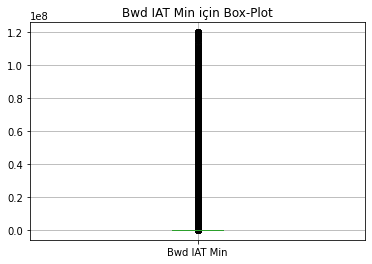

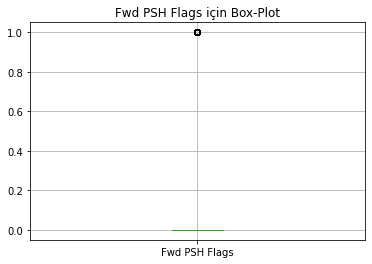

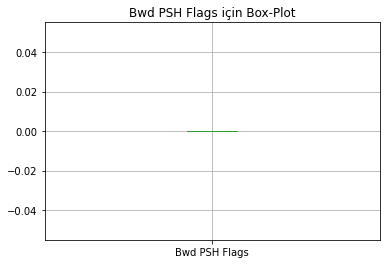

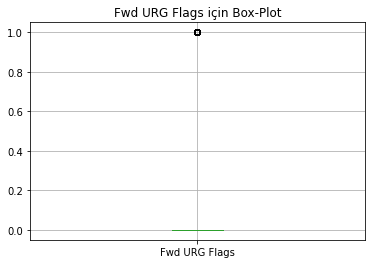

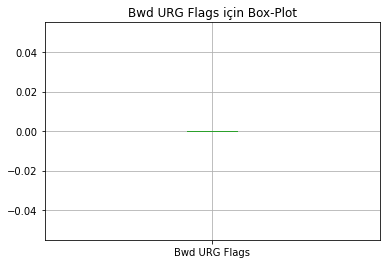

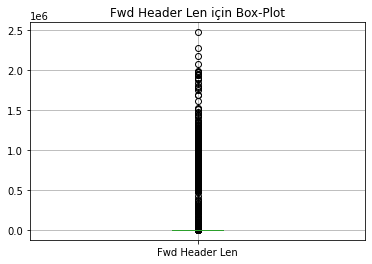

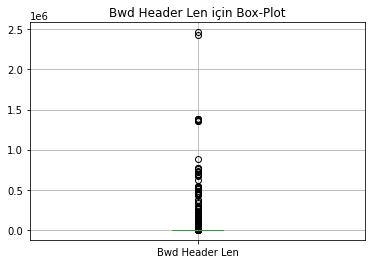

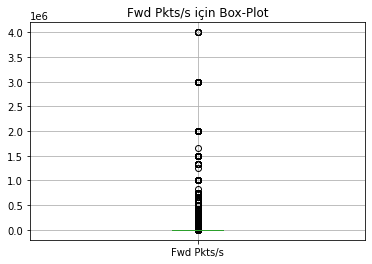

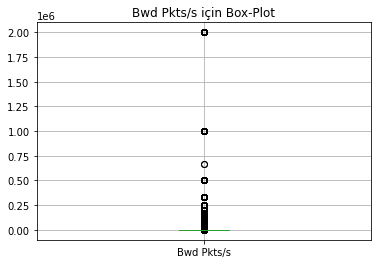

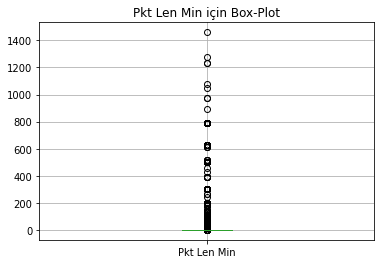

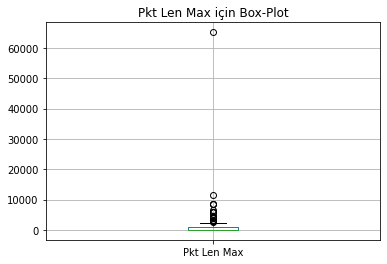

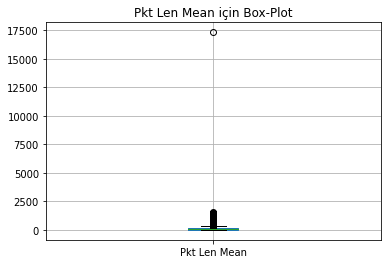

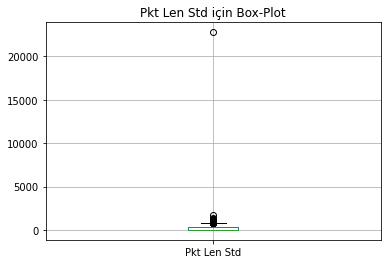

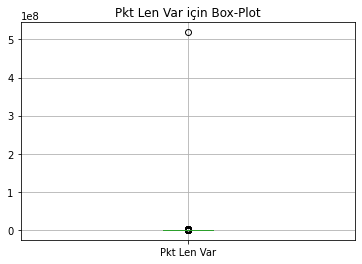

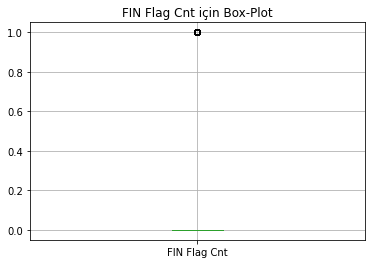

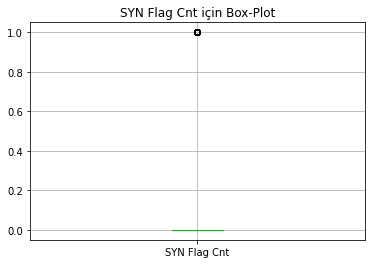

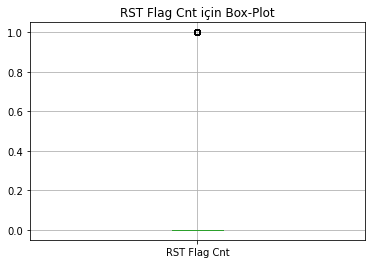

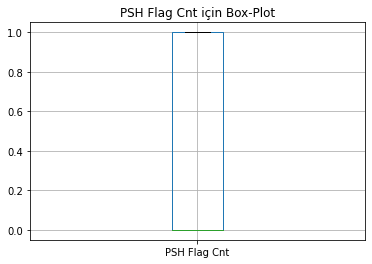

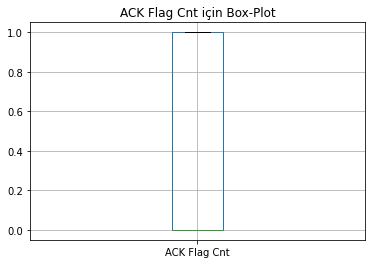

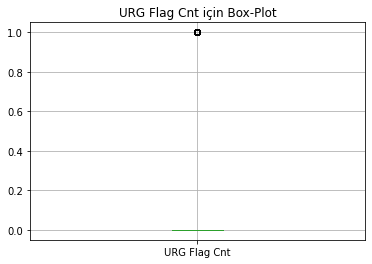

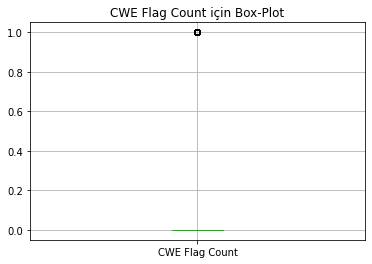

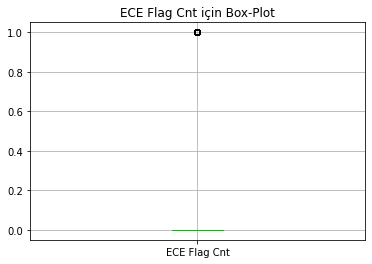

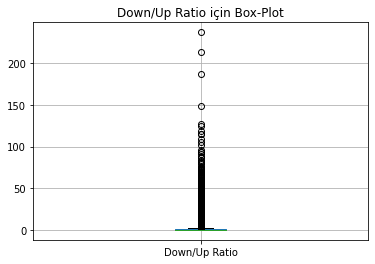

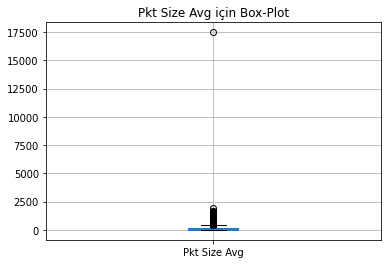

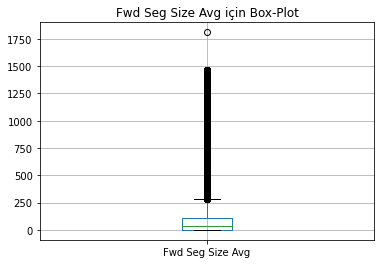

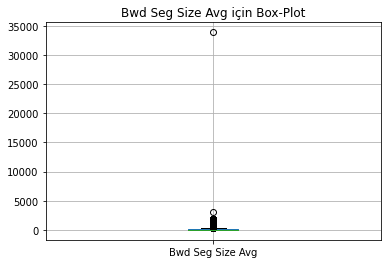

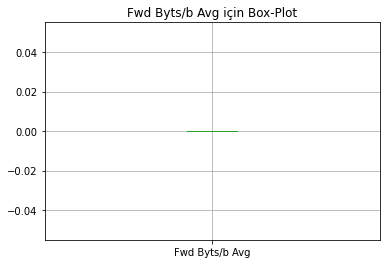

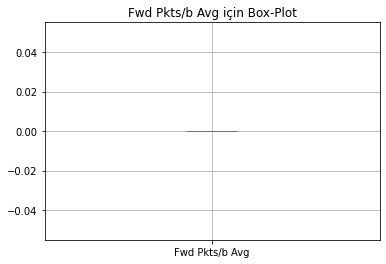

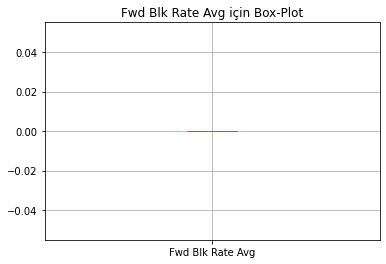

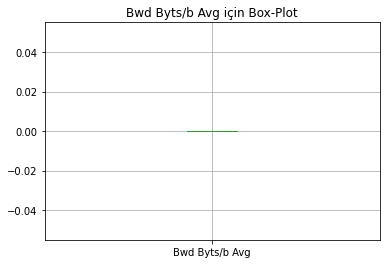

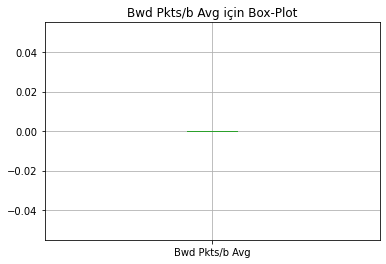

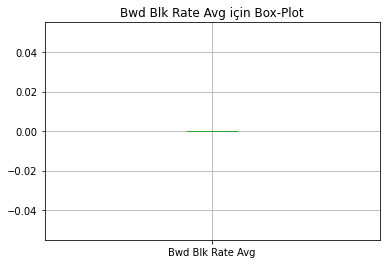

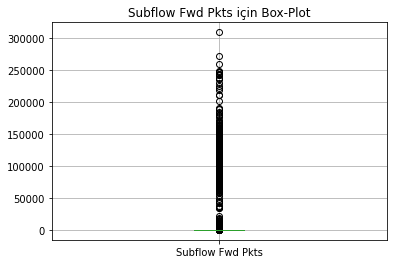

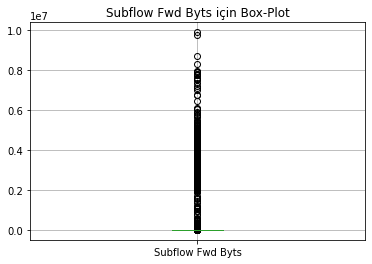

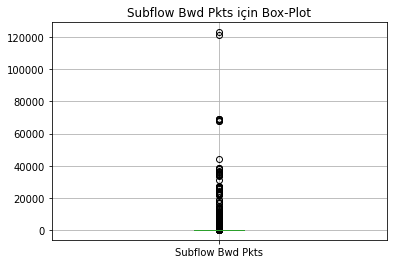

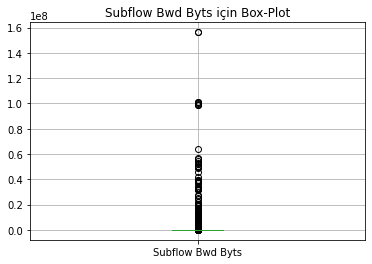

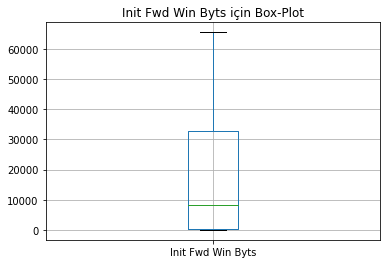

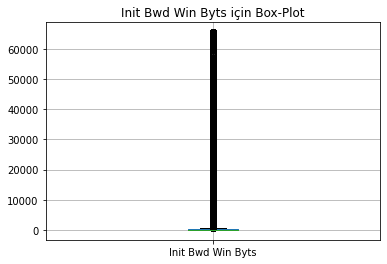

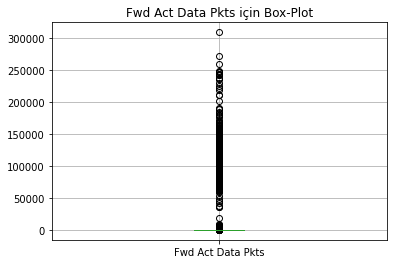

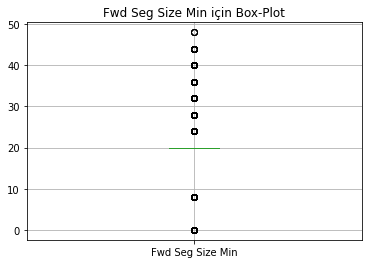

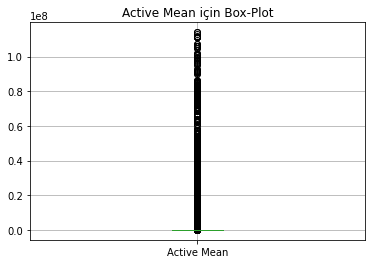

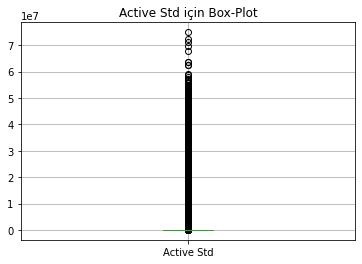

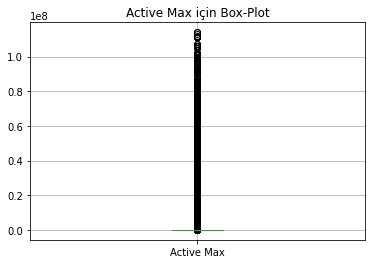

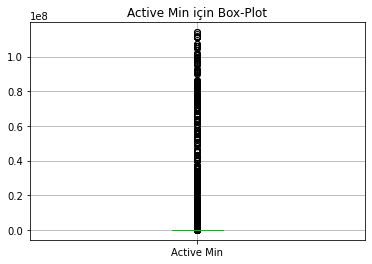

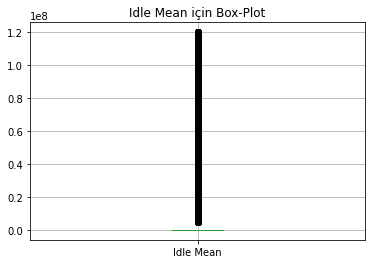

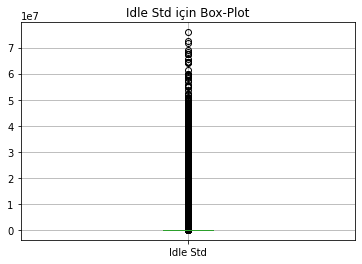

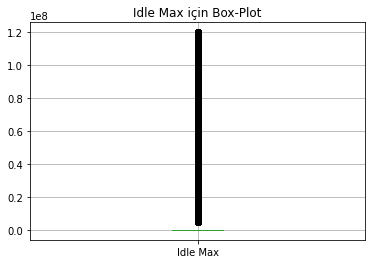

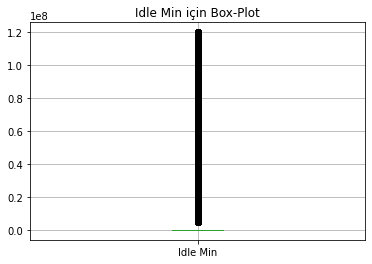

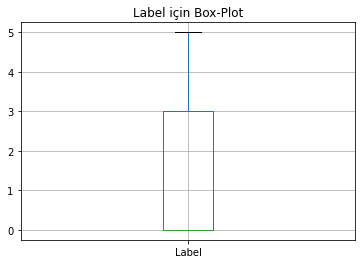

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

for column in df.columns:
    plt.figure()  
    df.boxplot(column=column)
    plt.title(f'{column} için Box-Plot')
    plt.show()


#### Aykırı Değerlerin Giderilmesi

In [7]:
# replace +ve and -ve infinity with NaN
df = df.replace([np.inf, -np.inf], np.nan)

In [8]:
df = df.replace([np.nan], 0)

#### Aykırı Değerlerin Medyan ile Giderilmesi

In [9]:
outlier_cols = ['Flow Duration', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Std',
                'Bwd Pkt Len Min', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean',
                'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
                'Fwd Header Len', 'Fwd Seg Size Avg', 'Subflow Fwd Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Active Mean',
                'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']


for col in outlier_cols:
    
    # Q1 ve Q3'ü hesaplama
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # IQR hesaplama
    IQR = Q3 - Q1

    # Alt ve Üst sınırları hesaplama
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    median_value = df[col].median()
    df.loc[df[col] > upper_bound, col] = median_value
    df.loc[df[col] < lower_bound, col] = median_value


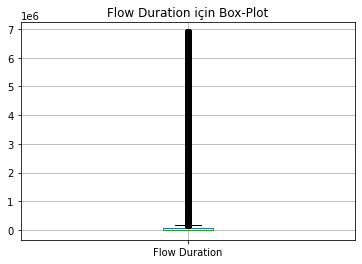

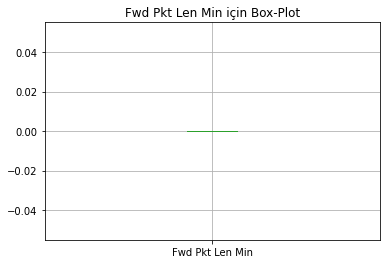

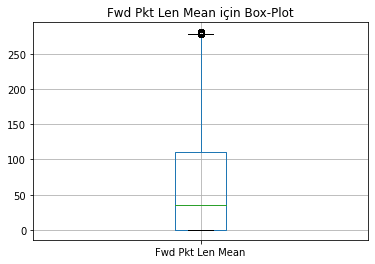

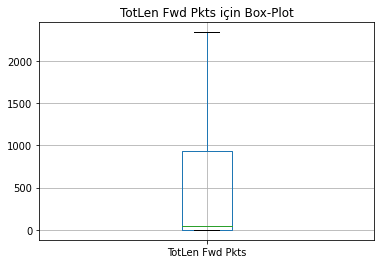

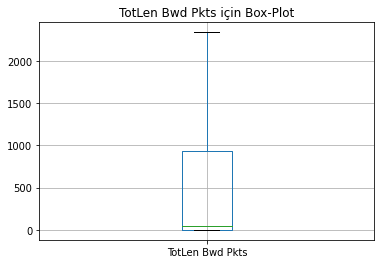

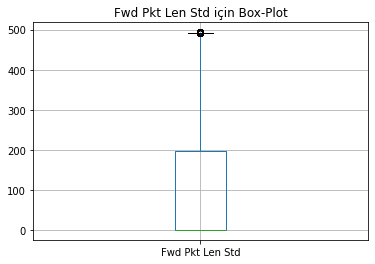

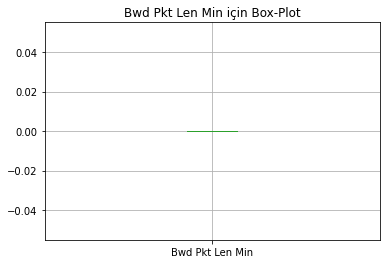

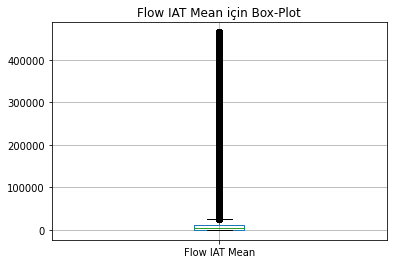

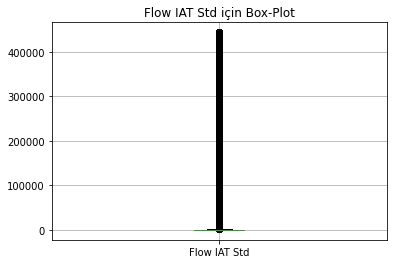

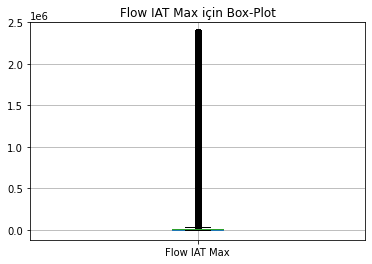

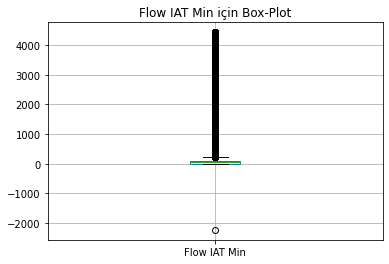

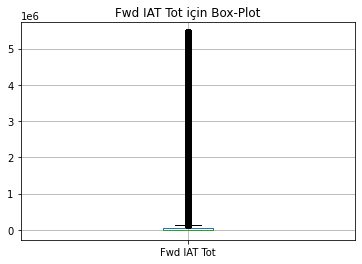

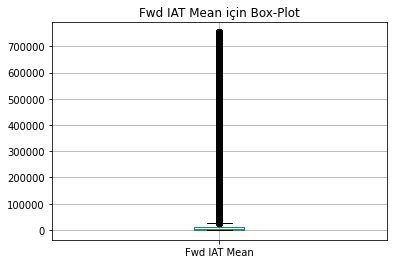

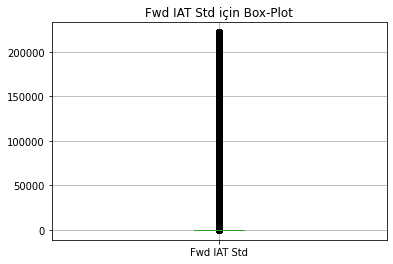

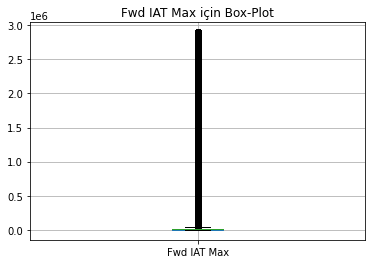

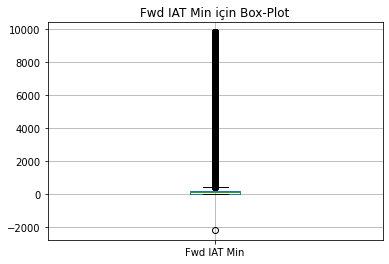

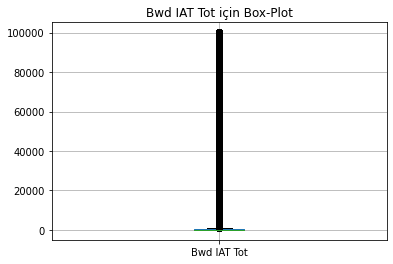

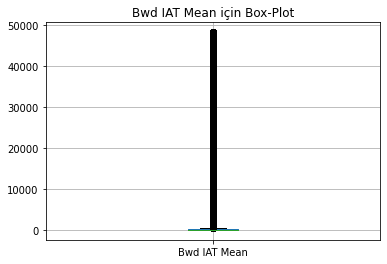

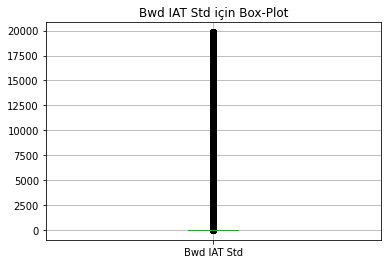

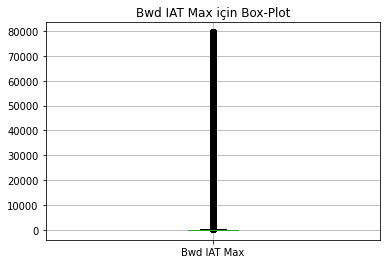

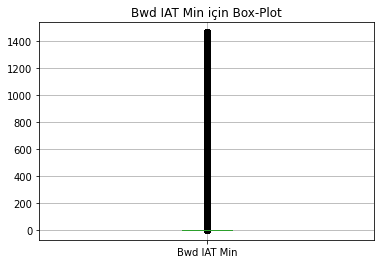

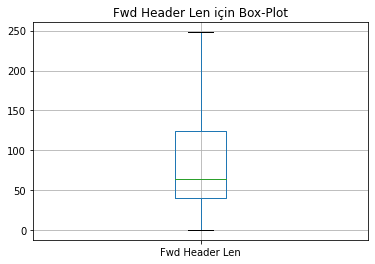

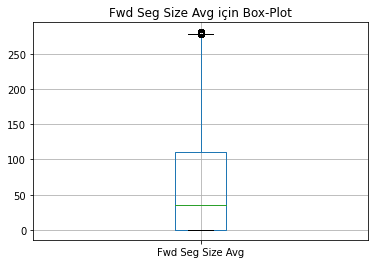

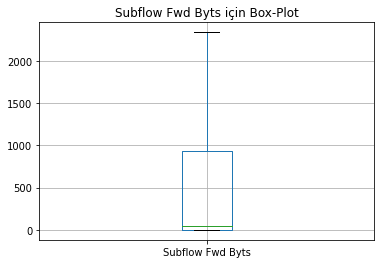

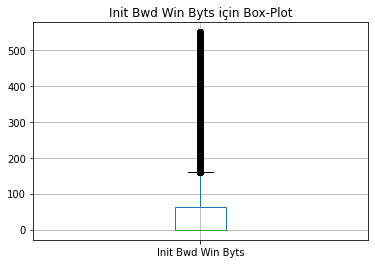

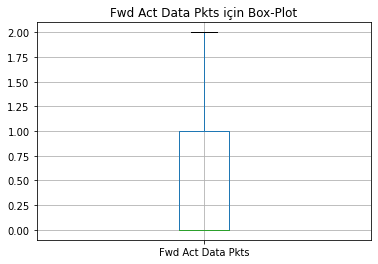

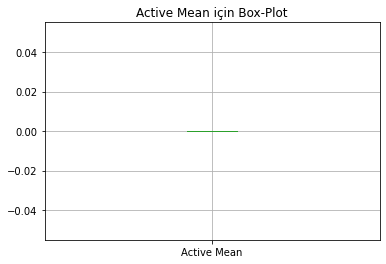

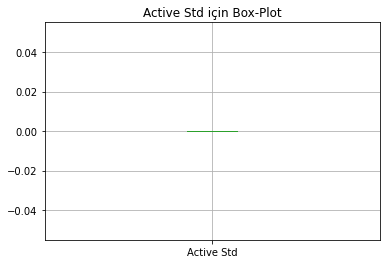

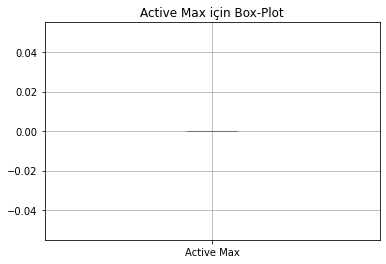

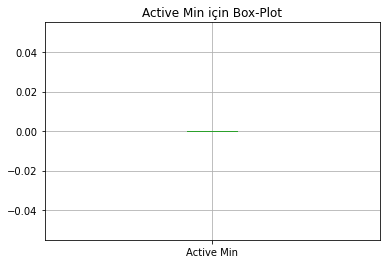

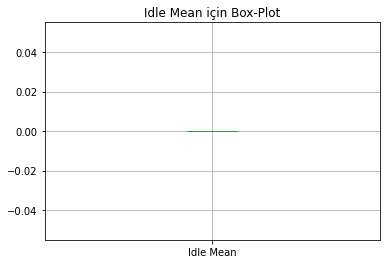

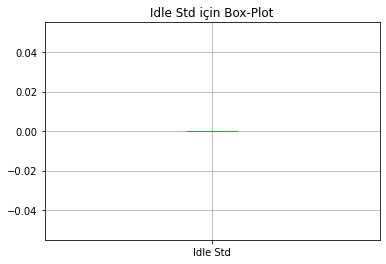

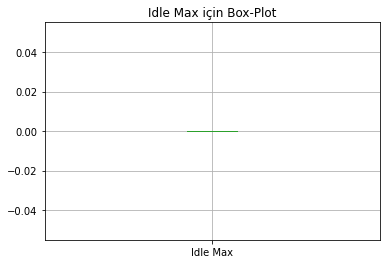

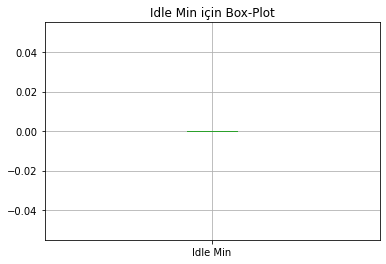

In [11]:
for column in outlier_cols:
    plt.figure()  
    df.boxplot(column=column)
    plt.title(f'{column} için Box-Plot')
    plt.show()


#### Aykırı Değerlerin RobustScaler ile Giderilmesi

In [10]:
from sklearn.preprocessing import RobustScaler


outlier_cols = ['Flow Duration', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean',
                'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
                'Init Bwd Win Byts']

for col in outlier_cols:
    scaler = RobustScaler()
    df[col] = scaler.fit_transform(df[[col]])


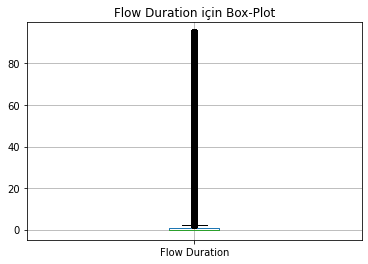

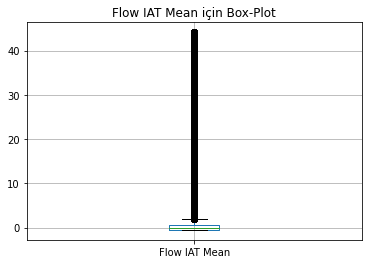

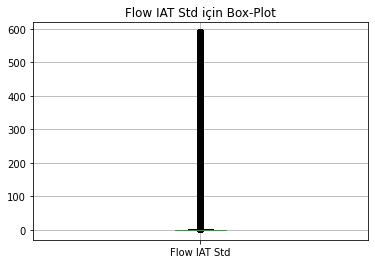

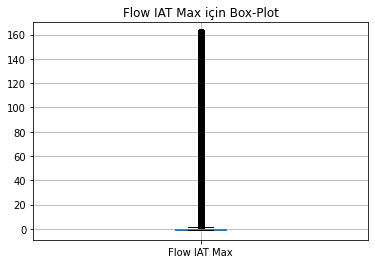

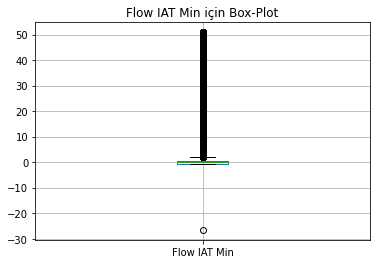

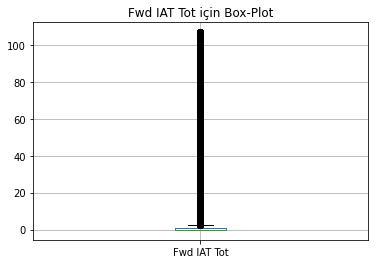

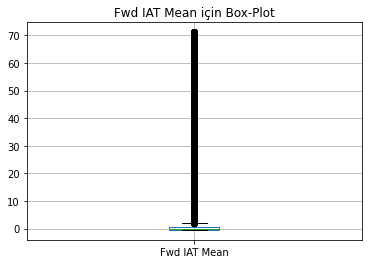

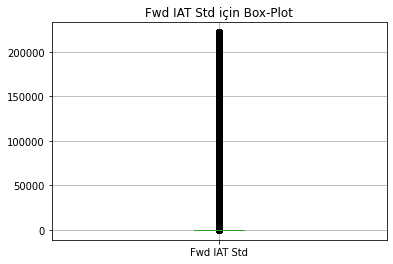

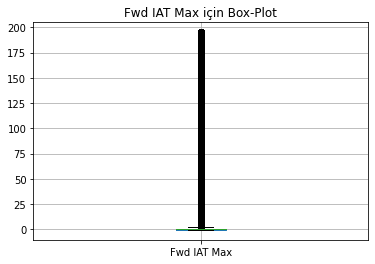

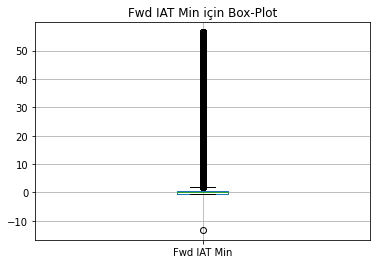

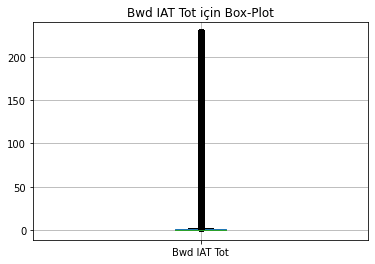

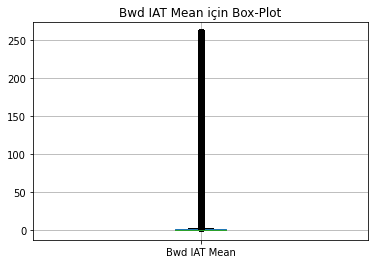

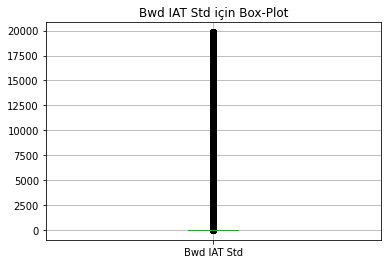

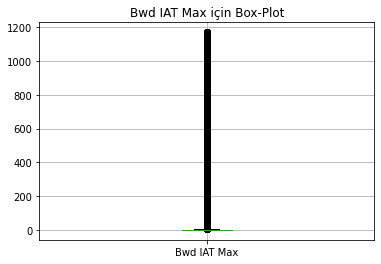

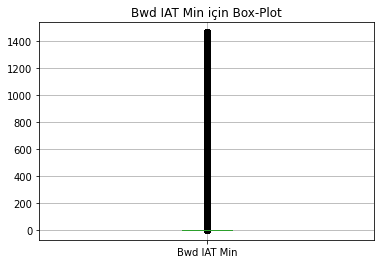

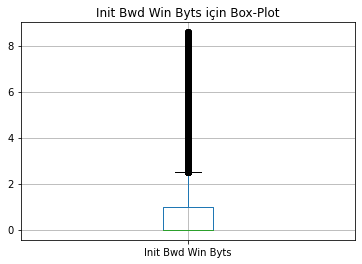

In [13]:
for column in outlier_cols:
    plt.figure()  
    df.boxplot(column=column)
    plt.title(f'{column} için Box-Plot')
    plt.show()

In [11]:
for col in outlier_cols:
    
    # Q1 ve Q3'ü hesaplama
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # IQR hesaplama
    IQR = Q3 - Q1

    # Alt ve Üst sınırları hesaplama
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


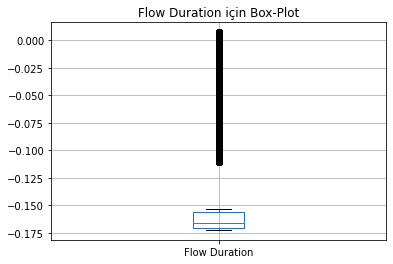

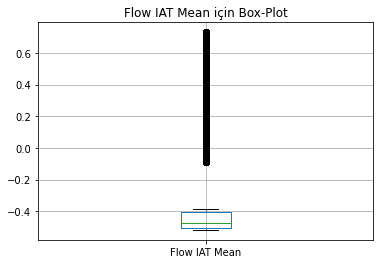

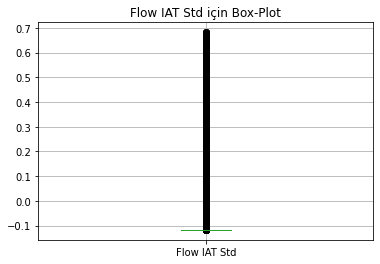

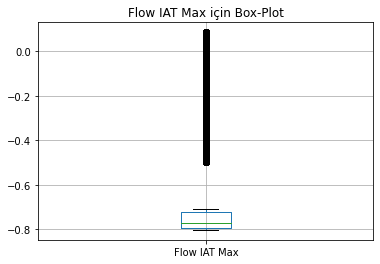

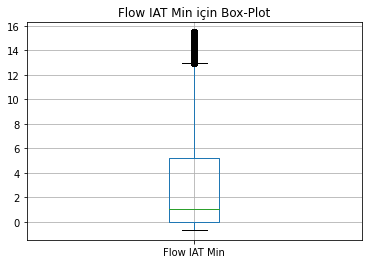

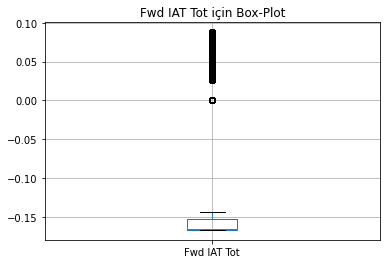

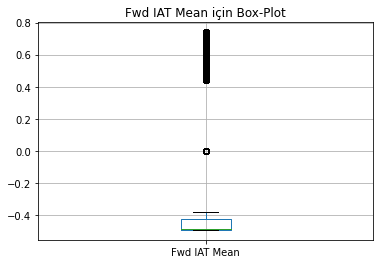

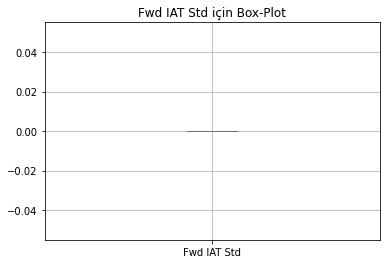

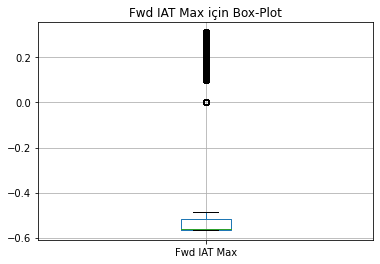

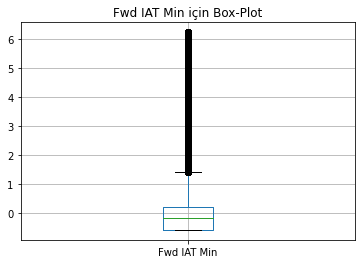

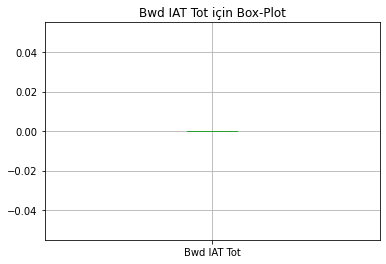

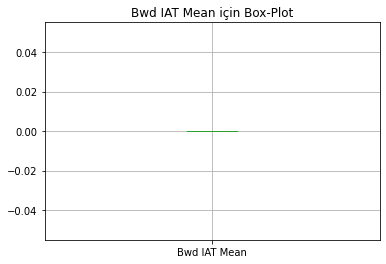

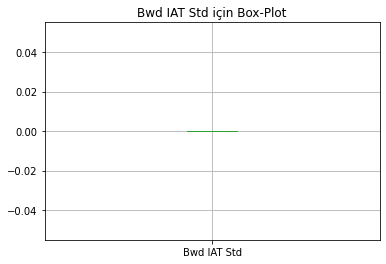

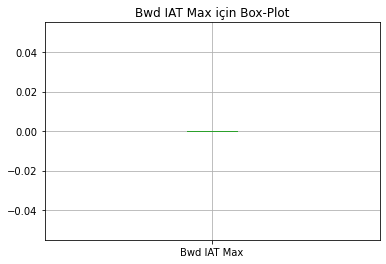

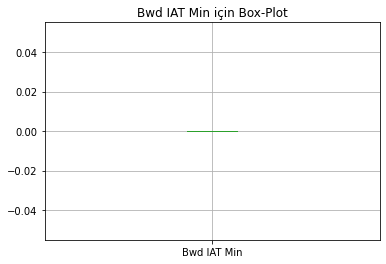

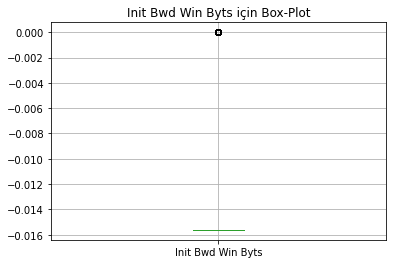

In [16]:
for column in outlier_cols:
    plt.figure()  
    df.boxplot(column=column)
    plt.title(f'{column} için Box-Plot')
    plt.show()

### DataFrame' in Model için Hazırlanması

* Hedef değişken ile özellik değişkenlerin ayrışması.
* Özellik değişkenlerin ölçeklendirilmesi.
* Eğitim ve test setinin ayrılması.

In [9]:
X = df.drop(columns=['Label'])
X = X.astype('float32')
y = df['Label']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (4525399, 78)
Shape of y: (4525399,)


In [10]:
min_max = MinMaxScaler(feature_range=(0,1))
X[X.columns] = min_max.fit_transform(X[X.columns])

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

### SMOTE ile Sentetik Veri Üretimi

In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print("Before: ", counter)

desired_samples = {
    1: 286191,
    2: 286191,  
    4: 286191,
    5: 286191,  
}
sampling_strategy = {label: desired_samples[label] for label in desired_samples if label in counter}
smt = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

X_train_sm,y_train_sm = smt.fit_resample(X_train, y_train)
counter = Counter(y_train_sm)
print("After: ", counter)

Before:  Counter({0: 2284725, 3: 1031872, 1: 228909, 4: 74370, 2: 405, 5: 38})
Before:  Counter({0: 2284725, 3: 1031872, 1: 228909, 4: 74370, 2: 405, 5: 38})
After:  Counter({0: 2284725, 3: 1031872, 1: 286191, 4: 286191, 2: 286191, 5: 286191})
After:  Counter({0: 2284725, 3: 1031872, 1: 286191, 4: 286191, 2: 286191, 5: 286191})


In [13]:
new_X = pd.concat([X_train_sm, X_test], axis = 0)
new_Y = pd.concat([y_train_sm, y_test], axis = 0)

In [18]:
new_X

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.001221,0.352941,0.000037,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.416667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0.123293,0.352941,0.000005,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.416667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,0.809628,0.352941,0.000389,0.000013,0.000016,0.000094,0.000094,0.141839,0.000000,0.103340,...,0.000003,0.416667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,0.780224,0.352941,0.036836,0.000013,0.000024,0.000094,0.000094,0.141839,0.000000,0.103340,...,0.000003,0.666667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,0.000809,1.000000,0.000004,0.000000,0.000008,0.000004,0.000004,0.006220,0.028082,0.022658,...,0.000000,0.166667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992696,0.828489,0.352941,0.000001,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.416667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
145462,0.548898,0.352941,0.045844,0.000013,0.000024,0.000094,0.000094,0.141839,0.000000,0.103340,...,0.000003,0.666667,0.0,0.0,0.0,0.0,0.045383,0.0,0.045383,0.045383
337629,0.001221,0.352941,0.000089,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.666667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3634595,0.123293,0.352941,0.000005,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.416667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.001221,0.352941,0.000037,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.416667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0.123293,0.352941,0.000005,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.416667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,0.809628,0.352941,0.000389,0.000013,0.000016,0.000094,0.000094,0.141839,0.000000,0.103340,...,0.000003,0.416667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,0.780224,0.352941,0.036836,0.000013,0.000024,0.000094,0.000094,0.141839,0.000000,0.103340,...,0.000003,0.666667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,0.000809,1.000000,0.000004,0.000000,0.000008,0.000004,0.000004,0.006220,0.028082,0.022658,...,0.000000,0.166667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992696,0.828489,0.352941,0.000001,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.416667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
145462,0.548898,0.352941,0.045844,0.000013,0.000024,0.000094,0.000094,0.141839,0.000000,0.103340,...,0.000003,0.666667,0.0,0.0,0.0,0.0,0.045383,0.0,0.045383,0.045383
337629,0.001221,0.352941,0.000089,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.666667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3634595,0.123293,0.352941,0.000005,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.416667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


### Model Denemesi

In [12]:
model = RandomForestClassifier( n_estimators=279, criterion='gini', random_state=42, n_jobs=-1, max_depth=7)

In [23]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# k değeri belirlenmesi
k = 3

# K-Fold cross-validator oluşturulması
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Kullanılacak skor metrikleri
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Çapraz doğrulama işlemi
cv_results = cross_validate(model, new_X, new_Y, cv=skf, scoring=scoring, return_train_score=True)

# Sonuçların yazdırılması
for metric in scoring:
    print(f"{metric.capitalize()} için her fold ortalaması: {np.mean(cv_results[f'test_{metric}']):.4f}")
    print(f"{metric.capitalize()} için standart sapma: {np.std(cv_results[f'test_{metric}']):.4f}")
    print(f"Her fold için {metric.capitalize()} skorları: {cv_results[f'test_{metric}']}\n")

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 2131, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 187, in wrapper
    return func(*args, **kwargs)
  File "C

Accuracy için her fold ortalaması: 0.9347
Accuracy için standart sapma: 0.0004
Her fold için Accuracy skorları: [0.9349351  0.93416923 0.93503066]

Precision için her fold ortalaması: nan
Precision için standart sapma: nan
Her fold için Precision skorları: [nan nan nan]

Recall için her fold ortalaması: nan
Recall için standart sapma: nan
Her fold için Recall skorları: [nan nan nan]

F1 için her fold ortalaması: nan
F1 için standart sapma: nan
Her fold için F1 skorları: [nan nan nan]



C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 2131, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 187, in wrapper
    return func(*args, **kwargs)
  File "C

Accuracy için her fold ortalaması: 0.9347
Accuracy için standart sapma: 0.0004
Her fold için Accuracy skorları: [0.9349351  0.93416923 0.93503066]

Precision için her fold ortalaması: nan
Precision için standart sapma: nan
Her fold için Precision skorları: [nan nan nan]

Recall için her fold ortalaması: nan
Recall için standart sapma: nan
Her fold için Recall skorları: [nan nan nan]

F1 için her fold ortalaması: nan
F1 için standart sapma: nan
Her fold için F1 skorları: [nan nan nan]



C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 2131, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 187, in wrapper
    return func(*args, **kwargs)
  File "C

In [14]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=279, n_jobs=-1,
                       random_state=42)

In [15]:
y_pred = model.predict(X_test)

In [16]:
print(accuracy_score(y_test, y_pred))

0.9807784947186989


### RandomizedSearch ile En Uygun Model Parametrelerinin Seçilmesi

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),       # Ağaç sayısı
    'max_depth': [3,5,7],             # Maksimum derinlik
}

model = RandomForestClassifier(random_state=42)

# RandomizedSearchCV nesnesi oluşturma
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=25, cv=2, scoring='f1_macro', n_jobs=1, verbose=2, random_state=42)

# Randomized search ile eğitimi yapma
random_search.fit(X_train, y_train)

# En iyi parametreleri yazdırma
print(f"Best Parameters: {random_search.best_params_}")

# Test seti üzerinde en iyi modeli değerlendirme
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Performans metriklerini yazdırma
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Fitting 2 folds for each of 25 candidates, totalling 50 fits
[CV] END ......................max_depth=7, n_estimators=279; total time=23.2min
[CV] END ......................max_depth=7, n_estimators=279; total time=24.5min
[CV] END ......................max_depth=3, n_estimators=114; total time= 4.9min
[CV] END ......................max_depth=3, n_estimators=114; total time= 4.8min
[CV] END ......................max_depth=7, n_estimators=171; total time=14.4min
[CV] END ......................max_depth=7, n_estimators=171; total time=14.2min
[CV] END ......................max_depth=3, n_estimators=120; total time= 5.2min
[CV] END ......................max_depth=3, n_estimators=120; total time= 5.1min
[CV] END ......................max_depth=7, n_estimators=221; total time=18.3min
[CV] END ......................max_depth=7, n_estimators=221; total time=18.6min
[CV] END ......................max_depth=7, n_estimators=174; total time=14.9min
[CV] END ......................max_depth=7, n_es

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98    571310
           1       0.99      1.00      1.00     57282
           2       1.00      0.07      0.14       108
           3       0.99      1.00      1.00    257672
           4       0.94      0.20      0.33     18693
           5       0.00      0.00      0.00        15

    accuracy                           0.98    905080
   macro avg       0.82      0.54      0.57    905080
weighted avg       0.98      0.98      0.98    905080



C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
import time

model = RandomForestClassifier(n_estimators=279, max_depth=7)

# Eğitim süresini ölçün
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

print(f"Model eğitimi {end_time - start_time:.2f} saniye sürdü.")

Model eğitimi 2804.46 saniye sürdü.


In [34]:
start_time = time.time()
predictions = model.predict(X_test)
end_time = time.time()

print(f"Tahmin süresi {end_time - start_time:.2f} saniye sürdü.")

Tahmin süresi 31.95 saniye sürdü.


### Model Değerlendirmesi

Accuracy: 0.98
Precision: 0.90
Recall: 0.72


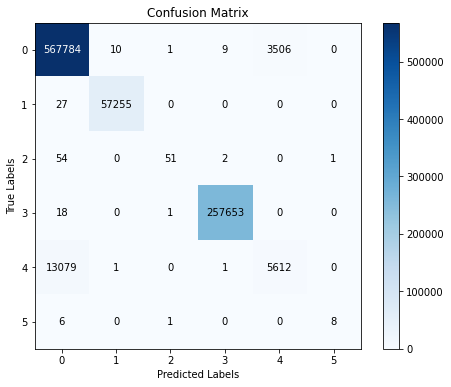

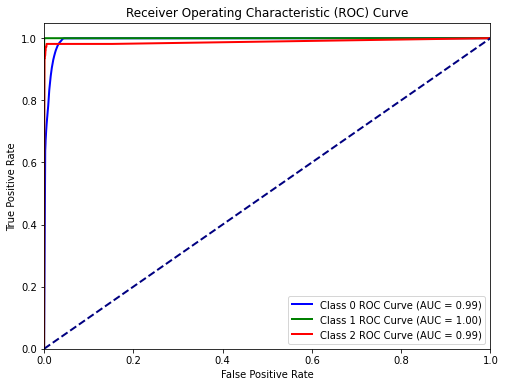

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99    571310\n           1       1.00      1.00      1.00     57282\n           2       0.94      0.47      0.63       108\n           3       1.00      1.00      1.00    257672\n           4       0.62      0.30      0.40     18693\n           5       0.89      0.53      0.67        15\n\n    accuracy                           0.98    905080\n   macro avg       0.90      0.72      0.78    905080\nweighted avg       0.98      0.98      0.98    905080\n'

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

error_rate = 1 - accuracy
print(f'Error_rate: {error_rate:.2f}')

# Precision değeri hesaplama. 
precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision: {precision:.2f}')

# Recall değeri hesaplama 
recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall: {recall:.2f}')

# Confusion matrix plotlama.
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(conf_matrix.shape[1]), np.arange(conf_matrix.shape[1]))
plt.yticks(np.arange(conf_matrix.shape[0]), np.arange(conf_matrix.shape[0]))

# Confusion matrix'e değerleri ekleme.
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()

# ROC eğrisi ve ROC AUC score hesaplama ve plotlama.
y_prob = model.predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_prob.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_prob[:, i])

# Tüm sınıfların ROC eğrilerini plotlama.
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red','purple','gray','yellow']
for i, color in zip(range(y_prob.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} ROC Curve (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [31]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    571310
           1       1.00      1.00      1.00     57282
           2       0.94      0.47      0.63       108
           3       1.00      1.00      1.00    257672
           4       0.62      0.30      0.40     18693
           5       0.89      0.53      0.67        15

    accuracy                           0.98    905080
   macro avg       0.90      0.72      0.78    905080
weighted avg       0.98      0.98      0.98    905080



Accuracy: 0.98
Error_rate: 0.02


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.82
Recall: 0.54


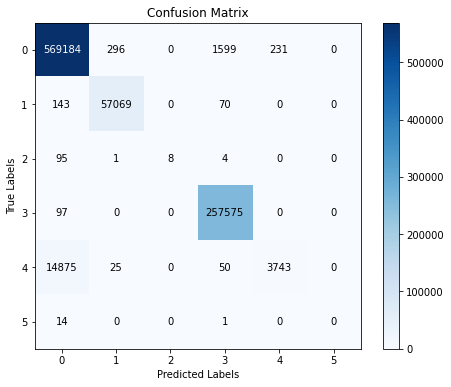

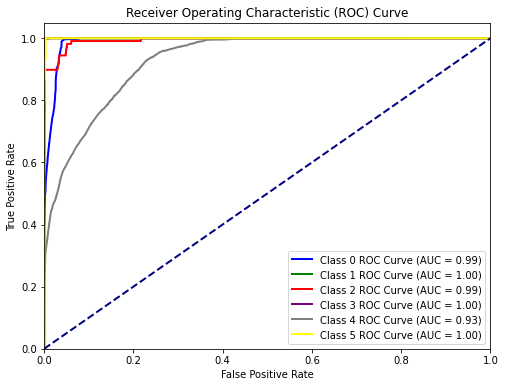

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98    571310
           1       0.99      1.00      1.00     57282
           2       1.00      0.07      0.14       108
           3       0.99      1.00      1.00    257672
           4       0.94      0.20      0.33     18693
           5       0.00      0.00      0.00        15

    accuracy                           0.98    905080
   macro avg       0.82      0.54      0.57    905080
weighted avg       0.98      0.98      0.98    905080



C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

error_rate = 1 - accuracy
print(f'Error_rate: {error_rate:.2f}')

# Precision değeri hesaplama. 
precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision: {precision:.2f}')

# Recall değeri hesaplama 
recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall: {recall:.2f}')

# Confusion matrix plotlama.
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(conf_matrix.shape[1]), np.arange(conf_matrix.shape[1]))
plt.yticks(np.arange(conf_matrix.shape[0]), np.arange(conf_matrix.shape[0]))

# Confusion matrix'e değerleri ekleme.
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()

# ROC eğrisi ve ROC AUC score hesaplama ve plotlama.
y_prob = model.predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_prob.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_prob[:, i])

# Tüm sınıfların ROC eğrilerini plotlama.
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red','purple','gray','yellow']
for i, color in zip(range(y_prob.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} ROC Curve (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

report = classification_report(y_test, y_pred)
print(report)

In [34]:
import joblib

# Save the model to a file
joblib_file = "D:/LogAI/randomforest_model_smote279.joblib"
joblib.dump(model, joblib_file)


['D:/LogAI/randomforest_model_smote279.joblib']

['D:/LogAI/randomforest_model_smote279.joblib']

### Sonuçlar

* Genel Sonuç iyi gibi görünse de sonuçlar sınıfsal açıdan incelediğinde model istenileni verememiştir. (45 dk eğitim 30 sn test)
* Bunun sebei büyük oranda sınıf dengesizliğidir. Bu da 2,4 ve 5 numaralı sınıfların tespitinin zorlaşmasına, yani hackerların bu saldırı türlerini kullanarak sisteme zarar vermesini tercih etmelerine sebep olabilir.
* Sentetik veri üretimi(oversampling), yoğun olan sınıfın örnek sayısının azaltılması(downsampling) uygulanabilir. Fakat özellikle sınıf 2 ve 5 için çok az sayıda örnek olduğu için oversamplingin tutarsız olma ihtimali yüksektir.(Dipnot: Eğer bu saldırı türleri hep belirli bir tutarlılık gösteriyor ise oversampling uygulaması kolaylaşır.)
* SMOTE

In [33]:
report = classification_report(y_test, y_pred) #SMOTE 
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    571310
           1       1.00      1.00      1.00     57282
           2       0.14      0.69      0.23       108
           3       0.99      1.00      1.00    257672
           4       0.70      0.29      0.41     18693
           5       0.21      0.87      0.33        15

    accuracy                           0.98    905080
   macro avg       0.67      0.81      0.66    905080
weighted avg       0.98      0.98      0.98    905080

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    571310
           1       1.00      1.00      1.00     57282
           2       0.14      0.69      0.23       108
           3       0.99      1.00      1.00    257672
           4       0.70      0.29      0.41     18693
           5       0.21      0.87      0.33        15

    accuracy                           0.98    905080
   macro avg       0.67

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def plot_acc(y_test,y_pred):

    cm = confusion_matrix(y_test, y_pred)

    # Her sınıf için accuracy hesaplama
    class_accuracies = []
    for i in range(cm.shape[0]):
        TP = cm[i, i]
        FN = np.sum(cm[i, :]) - TP
        accuracy = TP / (TP + FN) if (TP + FN) != 0 else 0
        class_accuracies.append(accuracy)

    # Sınıfların etiketleri
    class_labels = ['Benign', 'Bot', 'Brute Force', 'DoS', 'Infiltration', 'SQL Injection']

    # Sütun grafiği oluşturma
    plt.figure(figsize=(10, 6))
    plt.bar(class_labels, class_accuracies, color='skyblue')
    plt.xlabel('Sınıflar')
    plt.ylabel('Accuracy')
    plt.title('Sınıf Bazında Accuracy')
    plt.ylim(0, 1)  # Y eksenini 0-1 arasında sınırla (accuracy 0-100%)
    plt.xticks(rotation=45)  # Sınıf etiketlerini 45 derece döndür

    # Her sütunun üzerine accuracy değerlerini yazma
    for i, acc in enumerate(class_accuracies):
        plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

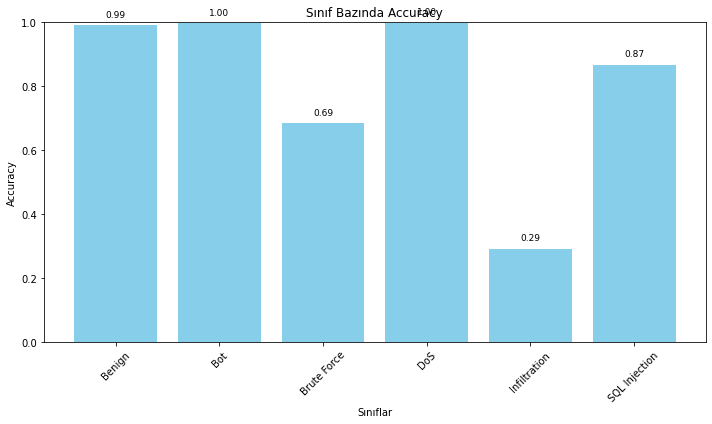

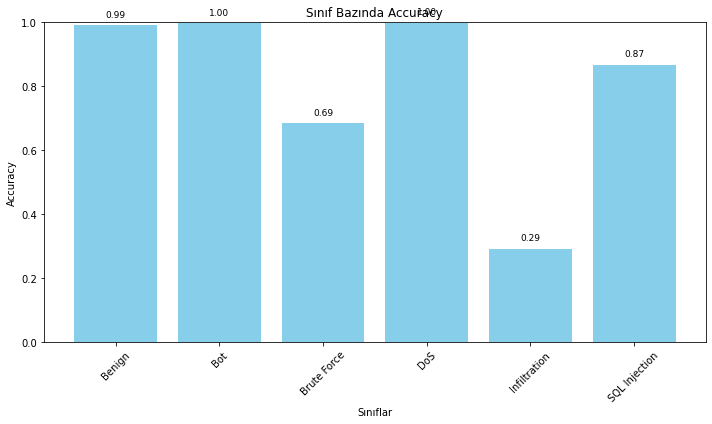

In [47]:
plot_acc(y_test,y_pred)

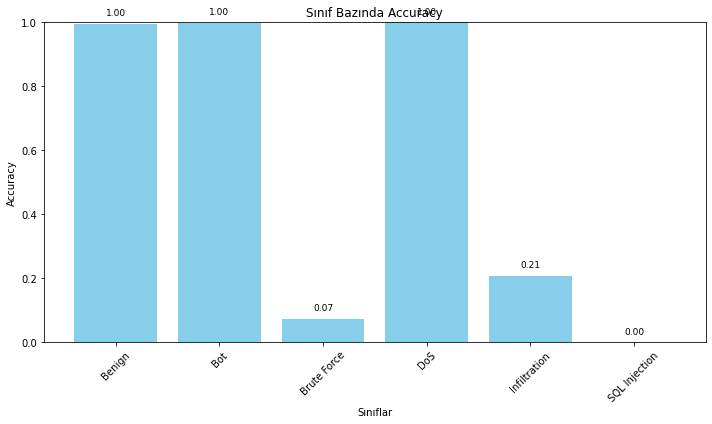

In [20]:
plot_acc(y_test,y_pred)